# <center> COVID-19 Cases (Focused on Malaysia)

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.pyplot import figure
import folium
import geopandas as gpd
from folium.plugins import TimestampedGeoJson

from pathlib import Path
data_dir = Path(r'C:\Users\Khairul Hafiz\Python\Raw Data\Corona')

import os
os.listdir(data_dir)

['covid_19_clean_complete.csv',
 'MYCovid',
 'my_bystate.csv',
 'submission.csv',
 'test.csv',
 'train.csv']

In [327]:
data = pd.read_csv(data_dir/'train.csv', parse_dates=['Date'])
data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17324 entries, 0 to 17323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              17324 non-null  int64         
 1   Province/State  7930 non-null   object        
 2   Country/Region  17324 non-null  object        
 3   Lat             17324 non-null  float64       
 4   Long            17324 non-null  float64       
 5   Date            17324 non-null  datetime64[ns]
 6   ConfirmedCases  17324 non-null  float64       
 7   Fatalities      17324 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [329]:
data.rename(columns={'Date': 'date', 
                     'Id': 'id',
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat',
                     'Long': 'long',
                     'ConfirmedCases': 'confirmed',
                     'Fatalities':'deaths',
                    }, inplace=True)
data.head()

,id,state,country,lat,long,date,confirmed,deaths
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [330]:
cleaned_data = pd.read_csv(data_dir/'covid_19_clean_complete.csv', parse_dates=['Date'])
cleaned_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [331]:
cleaned_data.rename(columns={'ObservationDate': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Last Update':'last_updated',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

# cases 
cases = ['confirmed', 'deaths', 'recovered', 'active']

# Active Case = confirmed - deaths - recovered
cleaned_data['active'] = cleaned_data['confirmed'] - cleaned_data['deaths'] - cleaned_data['recovered']

# replacing Mainland china with just China
cleaned_data['country'] = cleaned_data['country'].replace('Mainland China', 'China')

# filling missing values 
cleaned_data[['state']] = cleaned_data[['state']].fillna('')
cleaned_data[cases] = cleaned_data[cases].fillna(0)
cleaned_data.rename(columns={'Date':'date'}, inplace=True)

data = cleaned_data

In [332]:
print("External Data")
print(f"Earliest Entry: {data['date'].min()}")
print(f"Last Entry:     {data['date'].max()}")
print(f"Total Days:     {data['date'].max() - data['date'].min()}")

data.head()

External Data
Earliest Entry: 2020-01-22 00:00:00
Last Entry:     2020-03-23 00:00:00
Total Days:     61 days 00:00:00


,state,country,Lat,Long,date,confirmed,deaths,recovered,active
0,,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0











# Analysis of COVID-19 in Malaysia

In [333]:
myr = data[data['country']=='Malaysia']
myr.reset_index(drop=True, inplace=True)
myr

,state,country,Lat,Long,date,confirmed,deaths,recovered,active
0,,Malaysia,2.5,112.5,2020-01-22,0.0,0.0,0.0,0.0
1,,Malaysia,2.5,112.5,2020-01-23,0.0,0.0,0.0,0.0
2,,Malaysia,2.5,112.5,2020-01-24,0.0,0.0,0.0,0.0
3,,Malaysia,2.5,112.5,2020-01-25,3.0,0.0,0.0,3.0
4,,Malaysia,2.5,112.5,2020-01-26,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
57,,Malaysia,2.5,112.5,2020-03-19,900.0,2.0,75.0,823.0
58,,Malaysia,2.5,112.5,2020-03-20,1030.0,3.0,87.0,940.0
59,,Malaysia,2.5,112.5,2020-03-21,1183.0,4.0,114.0,1065.0
60,,Malaysia,2.5,112.5,2020-03-22,1306.0,10.0,139.0,1157.0


In [334]:
#number of new cases
n=1
newcase=[0]
while n < len(myr.confirmed):
    newcase.append(myr.confirmed[n] - myr.confirmed[n-1])
    n+=1

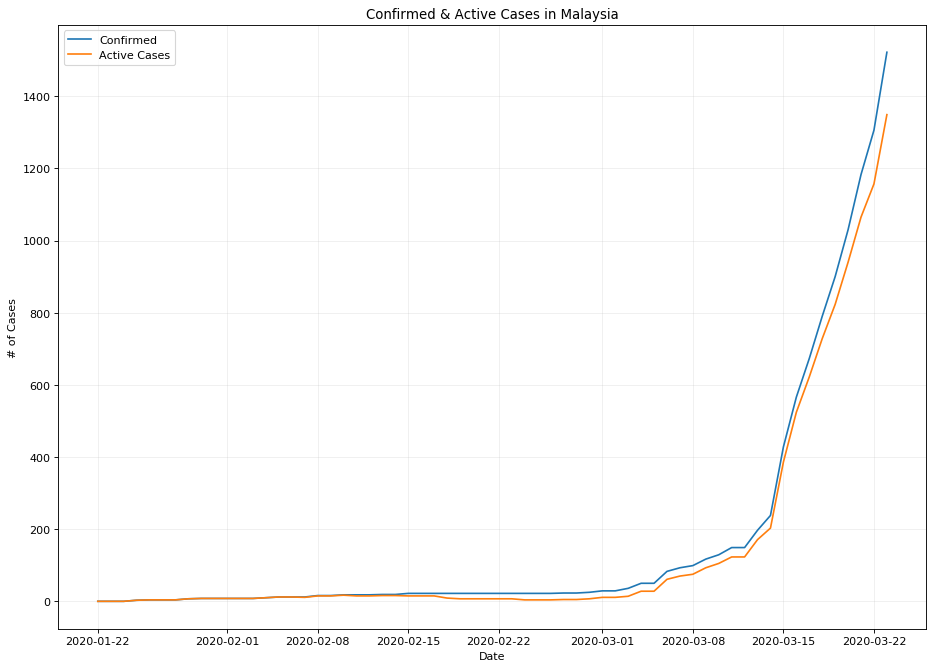

In [335]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Confirmed & Active Cases in Malaysia')
plt.xlabel('Date')
plt.ylabel('# of Cases')
plt.plot(myr.date,myr.confirmed,'-', label='Confirmed')
plt.plot(myr.date,myr.active,'-', label= 'Active Cases')



plt.grid(alpha=0.2)
plt.legend(loc="upper left")

# New Cases Daily

In [336]:
#Obtaining Fitting Curve
day = np.array(range(1,len(newcase)+1))

fitt=[1.212** element for element in day]
fitt2=[0.0015*element for element in fitt]


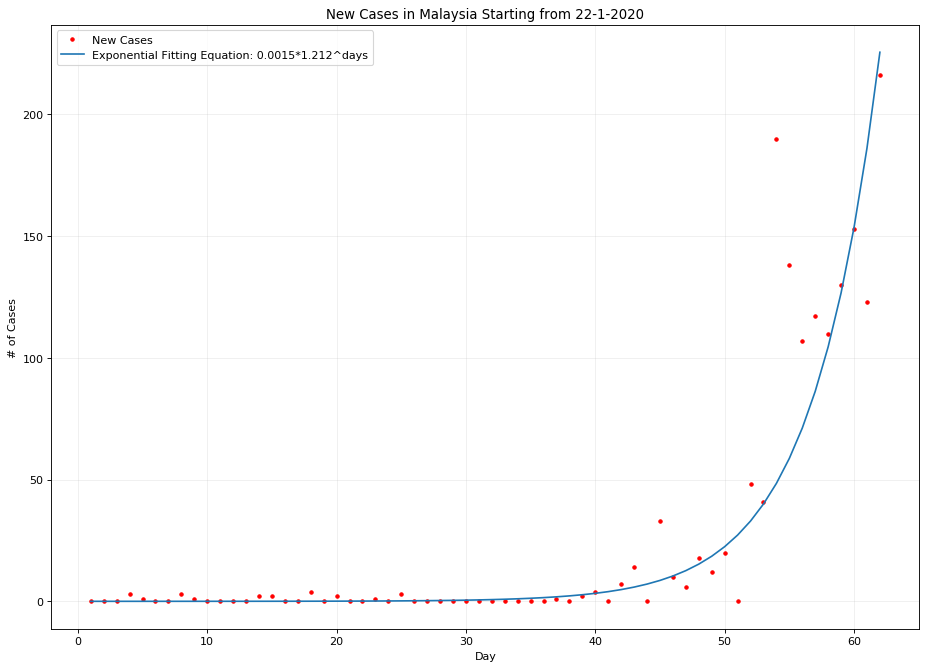

In [338]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel('Day')
plt.ylabel('# of Cases')
plt.title('New Cases in Malaysia Starting from 22-1-2020')


plt.plot(day,newcase,'.', label= 'New Cases', color='r')
plt.plot(day, fitt2, label=('Exponential Fitting Equation: 0.0015*1.212^days'))

plt.legend(loc="upper left")
plt.grid(alpha=0.2)


# Closed Cases in Malaysia

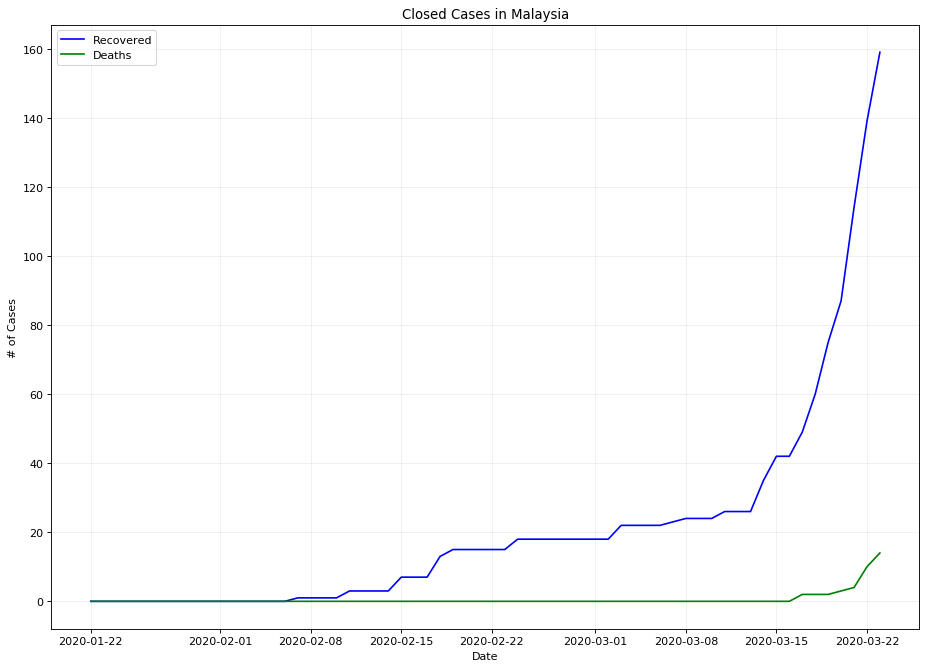

In [339]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Date')
plt.ylabel('# of Cases')
plt.title('Closed Cases in Malaysia')


plt.plot(myr.date,myr.recovered,'-', label='Recovered', color='blue')
plt.plot(myr.date,myr.deaths,'-', label= 'Deaths',color='green')
#plt.plot(myr.date,newcase,'.', label= 'New Cases', color='r')

plt.grid(alpha=0.2)
plt.legend(loc="upper left")

# Analysis by States in Malaysia

In [340]:
# download updated dates at https://www.kaggle.com/imdevskp/corona-virus-report

statepath=Path(r'C:\Users\Khairul Hafiz\Python\Raw Data\Corona\my_bystate.csv')
dfstate=pd.read_csv(statepath,encoding='latin1')
dfstate.head()

,state,addition,total,death,date
0,Johor,NaN,16,NaN,13-03-20
1,Kedah,NaN,5,NaN,13-03-20
2,Kelantan,NaN,3,NaN,13-03-20
3,KL&Putrajaya,NaN,33,NaN,13-03-20
4,Labuan,NaN,2,NaN,13-03-20


In [341]:
#dataframe for each state

ked = dfstate[dfstate['state']=='Kedah']
mel = dfstate[dfstate['state']=='Melaka']
kel = dfstate[dfstate['state']=='Kelantan']
kl = dfstate[dfstate['state']=='KL&Putrajaya']
per = dfstate[dfstate['state']=='Perlis']
pen = dfstate[dfstate['state']=='P.Pinang']
n9 = dfstate[dfstate['state']=='N. Sembilan']
joh = dfstate[dfstate['state']=='Johor']
pah = dfstate[dfstate['state']=='Pahang']
sab = dfstate[dfstate['state']=='Sabah']
sar = dfstate[dfstate['state']=='Sarawak']
lab = dfstate[dfstate['state']=='Labuan']
sel = dfstate[dfstate['state']=='Selangor']
ter = dfstate[dfstate['state']=='Terengganu']

Text(0, 0.5, '# of Cases')

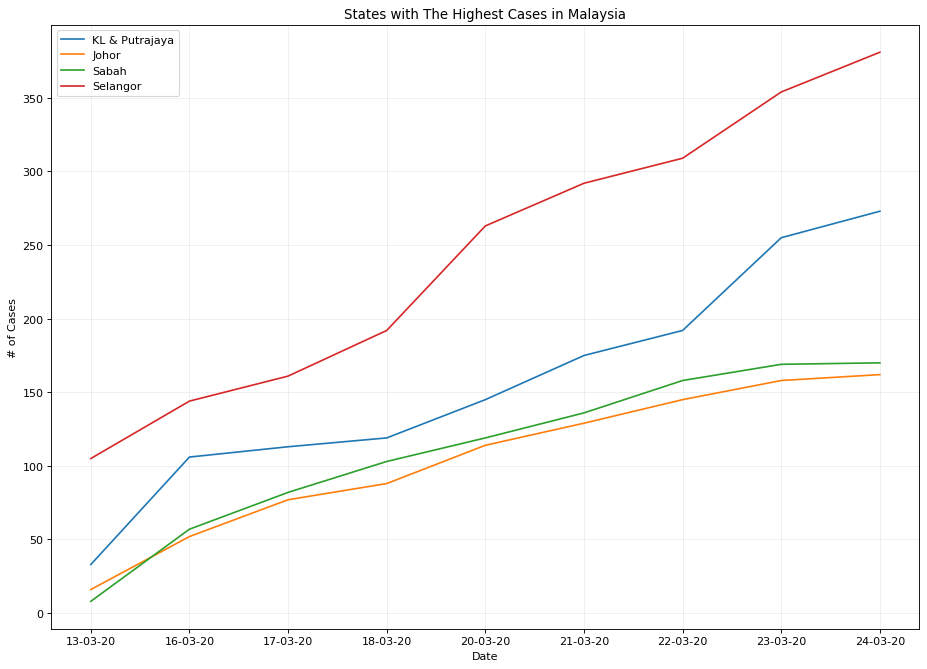

In [342]:

figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('States with The Highest Cases in Malaysia')

plt.plot(kl.date,kl.total, label='KL & Putrajaya')
plt.plot(joh.date,joh.total, label='Johor')
plt.plot(sab.date,sab.total, label='Sabah')
plt.plot(sel.date,sel.total, label='Selangor')


plt.grid(alpha=0.2)
plt.legend(loc="upper left")
plt.xlabel('Date')
plt.ylabel('# of Cases')

Text(0, 0.5, '# of Cases')

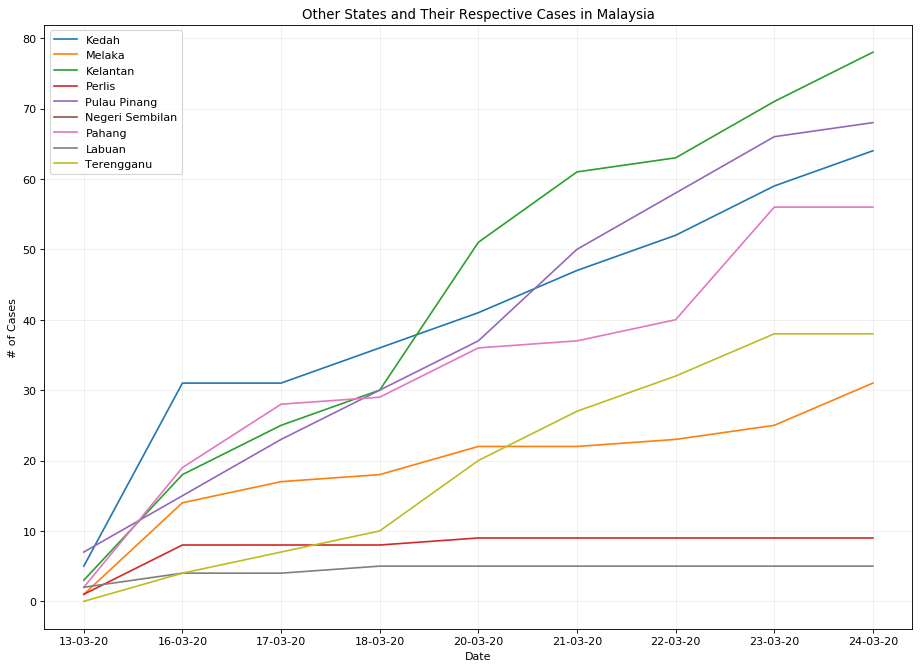

In [343]:

figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Other States and Their Respective Cases in Malaysia')

plt.plot(ked.date,ked.total, label='Kedah')
plt.plot(mel.date,mel.total, label='Melaka')
plt.plot(kel.date,kel.total, label='Kelantan')
plt.plot(per.date,per.total, label='Perlis')
plt.plot(pen.date,pen.total, label='Pulau Pinang')
plt.plot(n9.date,n9.total, label='Negeri Sembilan')
plt.plot(pah.date,pah.total, label='Pahang')
plt.plot(lab.date,lab.total, label='Labuan')
plt.plot(ter.date,ter.total, label='Terengganu')

plt.grid(alpha=0.2)
plt.legend(loc="upper left")
plt.xlabel('Date')
plt.ylabel('# of Cases')

# Creating Geographical Map

In [344]:
pdf = pd.DataFrame(pd.read_csv(r'Raw Data/StCoord.csv', index_col=0)) 
pdf1 =pdf.rename(index={'KL': 'KL&Putrajaya'})
pdf1

,Latitude,Longitude
State,,
Johor,1.937344,103.366585
Kedah,6.155672,100.569649
Kelantan,6.125397,102.238068
Melaka,2.194400,102.249100
N.Sembilan,2.731813,102.252502
Pahang,3.763400,103.220200
Perak,4.693950,101.090100
Perlis,6.443589,100.216599
P.Pinang,5.285153,100.456238


In [350]:
latest=dfstate[dfstate['date']=='24-03-20']
latest.reset_index(level=0,drop=True, inplace=True)
latest.set_index('state', inplace=True)
latest.head()

,addition,total,death,date
state,,,,
Selangor,27,381,0.0,24-03-20
KL&Putrajaya,17,273,2.0,24-03-20
Sabah,1,170,1.0,24-03-20
Johor,4,162,3.0,24-03-20
N.Sembilan,15,109,0.0,24-03-20


In [351]:
#normalization of total cases

tot_latest= latest.total.sum()
norm_today=(latest.total)/float(tot_latest)
norm_today

state
Selangor        0.234462
KL&Putrajaya    0.168000
Sabah           0.104615
Johor           0.099692
N.Sembilan      0.067077
Perak           0.060308
Sarawak         0.051077
Kelantan        0.048000
P.Pinang        0.041846
Kedah           0.039385
Pahang          0.034462
Terengganu      0.023385
Melaka          0.019077
Perlis          0.005538
Labuan          0.003077
Name: total, dtype: float64

In [352]:
def create_geojson_features(latest):
    print('> Creating GeoJSON features...')
    features = []
    for _, row in latest.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type':'Point', 
                'coordinates':[row['Longitude'],row['Latitude']]
            },
            'properties': {
                'time': row['Tahun'].date().__str__(),
                'style': {'color' : row['color']},
                'icon': 'circle',
                'iconstyle':{
                    'fillColor': row['color'],
                    'fillOpacity': 0.8,
                    'stroke': 'true',
                    'radius': 7
                }
            }
        }
        features.append(feature)
    return features

In [353]:
#def make_map(features):
m = folium.Map(width=900,height=550,location=[4.000, 102.295999],
        zoom_start=6.5) #tiles= Stamen Terrain, Stamen Toner, 

cir=200

def state_circle(MYState,warna):
    folium.CircleMarker(
        location=[pdf1.at[MYState,'Latitude'],pdf1.at[MYState,'Longitude']],
        radius=norm_today[MYState]*cir,
        popup=str(MYState),
        color=warna,
        fill=True,
        fill_color=warna,
        alpha=0.1
    ).add_to(m)
    #return

state_circle('Kedah','#3186cc')
state_circle('Kelantan','#3186cc')
state_circle('Perlis','#3186cc')
state_circle('Selangor','#3186cc')
state_circle('Melaka','#3186cc')
state_circle('Pahang','#3186cc')
state_circle('Johor','#3186cc')
state_circle('Terengganu','#3186cc')
state_circle('Perlis','#3186cc')
state_circle('KL&Putrajaya','red')
state_circle('Perak','#3186cc')
state_circle('P.Pinang','#3186cc')
state_circle('N.Sembilan','#3186cc')

In [354]:
m

In [315]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

ModuleNotFoundError: No module named 'plotly'